# REGRESION LOGISTICA
## DATASET [archive.ics.uci.edu](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


# CARGAMOS EL DATASET

In [3]:
dataset_url = 'https://github.com/cesarmayta/datasets/raw/refs/heads/main/heart_failure_clinical_records_dataset.csv'

heart_df = pd.read_csv(dataset_url)
heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
heart_df.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


# CORRELACIONES

In [5]:
cols = ['age', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']

heart_df[cols].corr()

,age,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
creatinine_phosphokinase,-0.081584,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316
smoking,0.018668,0.002421,-0.147173,-0.067315,-0.055711,0.028234,-0.027414,0.004813,0.445892,1.000000,-0.022839,-0.012623


<Axes: >

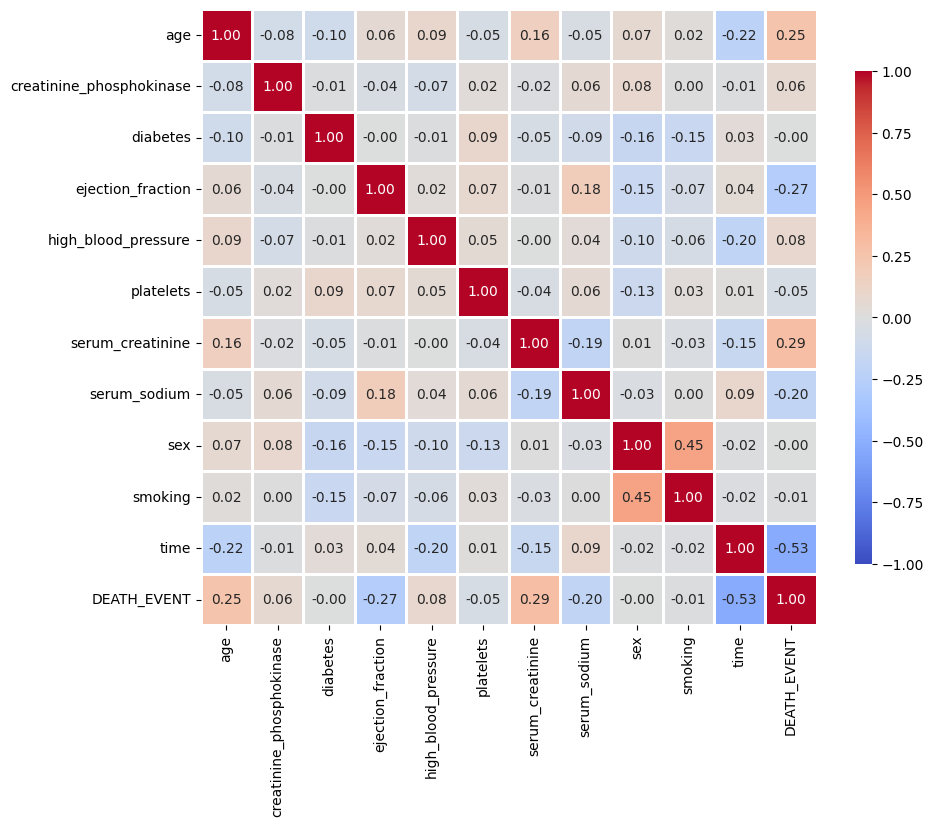

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    data=heart_df[cols].corr(numeric_only=True),
    cmap="coolwarm",  # Mejor contraste de colores
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.8,
    cbar_kws={"shrink": 0.8, "aspect": 30},  # Ajustar barra de color
    annot=True,  # Mostrar valores
    fmt=".2f",  # Formato de los números en el gráfico
    annot_kws={"size": 10},  # Tamaño de los números
    square=True  # Cuadrícula más uniforme
)

In [10]:
corr_matrix = heart_df[cols].corr()
corr_with_death = corr_matrix["DEATH_EVENT"].drop("DEATH_EVENT").sort_values(ascending=False)
corr_with_death

,DEATH_EVENT
serum_creatinine,0.294278
age,0.253729
high_blood_pressure,0.079351
creatinine_phosphokinase,0.062728
diabetes,-0.001943
sex,-0.004316
smoking,-0.012623
platelets,-0.049139
serum_sodium,-0.195204
ejection_fraction,-0.268603


# REGRESIÓN LOGISTICA

In [12]:
model_heart = smf.logit(
    formula='DEATH_EVENT ~ serum_creatinine + age + high_blood_pressure + creatinine_phosphokinase',
    data=heart_df
).fit()
model_heart.summary()

Optimization terminated successfully.
         Current function value: 0.558734
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            2
Date:                Fri, 07 Feb 2025   Pseudo R-squ.:                  0.1098
Time:                        03:21:39   Log-Likelihood:                -167.06
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.117e-09
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.2715      0.755     -5.661      0.000      -5.750      -2.793
serum_creatinine     0.7137      0.190      3.751      0.000       0.341       1.087
age                  0.0408      0.012      3.538      0.000       0.018       0.063
====================================================================================
"""

In [13]:
heart_predictions = pd.DataFrame(
    dict(
        actual_value=heart_df.DEATH_EVENT,
        predicted_value=model_heart.predict().round()
    )
)
heart_predictions

,actual_value,predicted_value
0,1,1.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,1.0
...,...,...
294,0,0.0
295,0,0.0
296,0,0.0
297,0,0.0


# MATRIZ DE CONFUSIÓN

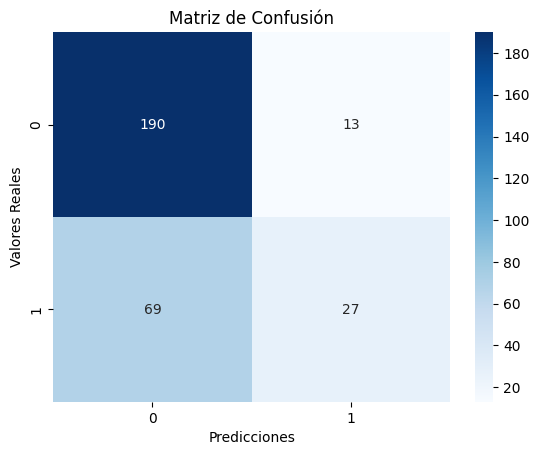

In [14]:

from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
conf_matrix = confusion_matrix(heart_predictions['actual_value'], heart_predictions['predicted_value'])

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Añadir etiquetas y título
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()


In [15]:
print(f'Pseudo R2 : {model_heart.prsquared:.4f}')

Pseudo R2 : 0.1098


In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(heart_predictions['actual_value'],heart_predictions['predicted_value'])
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.7258
